In [1]:
import numpy as np
import scipy.io.wavfile as wavfile
import time
import os
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.mlab import bivariate_normal
import glob

## Initialization
import IPython.display as ipd

In [2]:
def plot_waveform(data, start, end):
    '''
    Signal Visualization
    
    Parameters:
    data (nd.array): the data we want to visualize
    start (int): start range
    end (int): end range

    Returns:
    None: just shows the graph  
    
    '''
    data = data[start:end]
    plt.plot(data)
    plt.ylabel('amplitude')
    plt.xlabel('samples')
    plt.show()
    return None

In [3]:
file_name = 'sinusoid.wav'
sampling_rate = 16000 # hz
omega = np.pi / 10 # radians per sample (pysical_frequency = sampling_rate * omega / (2*np.pi))
amplitude = 1000
N = 3 * sampling_rate # lenght of signal

In [4]:
coef_no = int(N / 2) + 1 # amount of independent coefficients
samples = np.array(list(range(N))) # sample indices 
freqs = np.array(list(range(coef_no))) * sampling_rate / N # frequencies of current signal spectrum

In [5]:
sinusoid = amplitude*np.sin(omega * samples) # sinusoidal signal
sinusoid = sinusoid.astype('int16')
wavfile.write(file_name, sampling_rate, sinusoid)

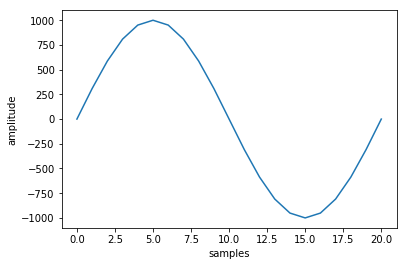

In [6]:
plot_waveform(sinusoid, 0, 21)

In [7]:
ipd.Audio(sinusoid, rate=sampling_rate)

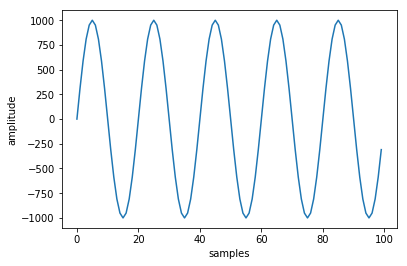

In [8]:
plot_waveform(sinusoid, 0, 100)

In [9]:
coefs_sinusoid = np.fft.rfft(sinusoid) # DFT coefs for 0, 1, ..., floor(N/2) base vectors
amplitude_spectr = np.abs(coefs_sinusoid)
db_spectr = 10*np.log10(amplitude_spectr + 1)

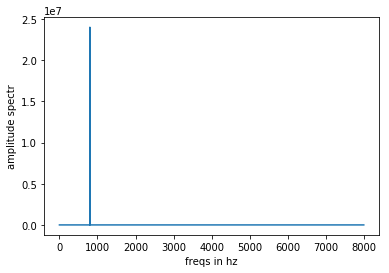

In [10]:
plt.plot(freqs, amplitude_spectr)
plt.xlabel('freqs in hz')
plt.ylabel('amplitude spectr')
plt.show()

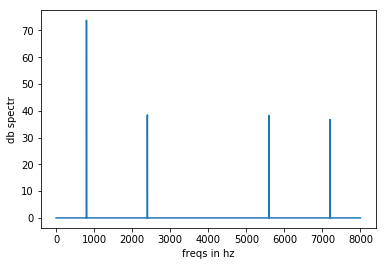

In [11]:
plt.plot(freqs, db_spectr)
plt.xlabel('freqs in hz')
plt.ylabel('db spectr')
plt.show()